## DNN
Exercise 2

Group: Ragù

Edoardo Spadetto, Matteo Bortoletto, Filippo Costa, Clelia Corridori

In [1]:
import math
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from itertools import permutations
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers

# reproducibility
np.random.seed(12345)

#digits from 1 to 9
D = 9
#training data
perc_training = 0.8

Using TensorFlow backend.


In [2]:
fname = '/Users/alida/Desktop/secretkeys_exe.csv'
dataset = np.loadtxt(fname, delimiter = ',', dtype = int)
N = len(dataset)
# extract data and labels
s = dataset[:,0]
y = dataset[:,-1]

#lenght of a given string
L = len(str(s[0]))
print(L)
LD = L*D
print(LD)

#ROTR: to augment the data with a shift
def rotr(string, n):
    return string[n:] + string[:n]

s = list(s)
y = list(y)
    
for i in range(len(s)):
    for j in range(6):
        p = rotr(str(s[i]),j)
        s.append(int(p))
        y.append(y[i])
        
s = np.array(s)  #array with datas + data obtained trough shifts

# Shuffle two lists with same order 
# Using zip() + * operator + shuffle() 
temp = list(zip(s, y)) 
np.random.shuffle(temp) 
s, y = zip(*temp)

for i in range(10):
    print(s[i], y[i])
    
N = len(s)    
 
N_train = int(perc_training*N)
print(f'data: {N}\ntrain: {N_train}')

7
63
7343452 0
9966699 0
1365776 0
3577339 1
6285356 1
3735374 1
7394773 1
3192112 0
8571848 0
2339369 0
data: 21000
train: 16800


In [3]:
def expand(S):
    if(len(str(S))!=L):
        print('mismatch!')
        return []
    x = [0]*LD
    p = 10**(L-1)
    j = 0
    while j < L:
        q = int(S/p)
        x[j*D+(q-1)] = 1
        j += 1
        S = S - q*p
        p = int(p/10)
    return x
print(s[0], '-->', expand(s[0]))

7343452 --> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


### Split training and test data

In [4]:
x_all = [None]*N
for i in range(N):
    x_all[i] = expand(s[i])   
print(x_all[0])
(x_train, y_train) = (x_all[0:N_train], y[0:N_train])
(x_test, y_test) = (x_all[N_train:], y[N_train:])
print(len(x_train),'\t', len(x_test))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
16800 	 4200


### Define the model with Keras

In [5]:
model = Sequential()
model.add(Dense(LD, input_shape=(LD,), activation = 'relu'))
model.add(Dense(max(10,int(LD/2)), activation='relu'))
model.add(Dense(max(6,int(LD/4)), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_2 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [6]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [7]:
fit = model.fit(x_train, y_train, 
                epochs = 80, batch_size = 20,
                validation_data=(x_test, y_test))

Train on 16800 samples, validate on 4200 samples
Epoch 1/80
16800/16800 [==============================] - 2s 116us/step - loss: 0.4633 - accuracy: 0.7739 - val_loss: 0.3875 - val_accuracy: 0.8026
Epoch 2/80
16800/16800 [==============================] - 2s 105us/step - loss: 0.2776 - accuracy: 0.8702 - val_loss: 0.2299 - val_accuracy: 0.8936
Epoch 3/80
16800/16800 [==============================] - 2s 107us/step - loss: 0.1855 - accuracy: 0.9227 - val_loss: 0.1957 - val_accuracy: 0.9131
Epoch 4/80
16800/16800 [==============================] - 2s 107us/step - loss: 0.1601 - accuracy: 0.9334 - val_loss: 0.2159 - val_accuracy: 0.9010
Epoch 5/80
16800/16800 [==============================] - 2s 102us/step - loss: 0.1492 - accuracy: 0.9404 - val_loss: 0.2050 - val_accuracy: 0.9071
Epoch 6/80
16800/16800 [==============================] - 2s 107us/step - loss: 0.1401 - accuracy: 0.9449 - val_loss: 0.2006 - val_accuracy: 0.9114
Epoch 7/80
16800/16800 [==============================] - 1s 85

Epoch 56/80
16800/16800 [==============================] - 2s 102us/step - loss: 0.0260 - accuracy: 0.9902 - val_loss: 0.5532 - val_accuracy: 0.9152
Epoch 57/80
16800/16800 [==============================] - 2s 104us/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.4803 - val_accuracy: 0.9202
Epoch 58/80
16800/16800 [==============================] - 2s 106us/step - loss: 0.0229 - accuracy: 0.9922 - val_loss: 0.5719 - val_accuracy: 0.9114
Epoch 59/80
16800/16800 [==============================] - 2s 103us/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.4864 - val_accuracy: 0.9193
Epoch 60/80
16800/16800 [==============================] - 2s 104us/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.5524 - val_accuracy: 0.9143
Epoch 61/80
16800/16800 [==============================] - 2s 105us/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.5415 - val_accuracy: 0.9152
Epoch 62/80
16800/16800 [==============================] - 2s 109us/step - loss: 0.0189 - accuracy: 0.9936

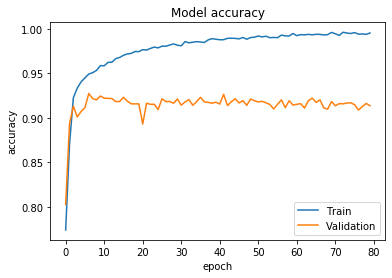

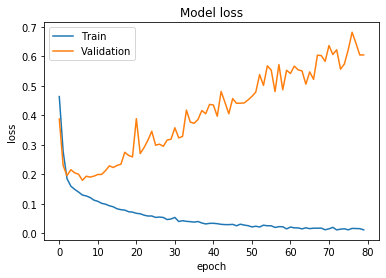

In [8]:
import matplotlib.pyplot as plt

# plot accuracy, train and validation
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()


## Grid Search

In [9]:
def create_DNN(acti,rat):
    model = Sequential()
    model.add(Dense(LD, input_shape=(LD,), activation = acti))
    model.add(Dense(max(10,int(LD/2)), activation = acti))
    model.add(Dense(max(6,int(LD/4)), activation = acti))
    model.add(Dropout(rate = rat))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [10]:
# def compile_model(optimizer=optimizers.Adam(),activation=activation.relu(),rate=0.2):
def compile_model(opt, act, rate):
    # create the mode
    model=create_DNN(act,rate)
    # compile the model
    model.compile(loss = 'binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
    return model

In [ ]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=15, 
                        batch_size=20, 
                        verbose=1)

parameters = {'opt':['adam','rmsprop','SGD'], 'act':['relu', 'sigmoid', 'elu'], 'rate':[0.2, 0.3, 0.4]}

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=parameters, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/15
12600/12600 [==============================] - 2s 123us/step - loss: 0.4847 - accuracy: 0.7700
Epoch 2/15
12600/12600 [==============================] - 1s 97us/step - loss: 0.3384 - accuracy: 0.8456
Epoch 3/15
12600/12600 [==============================] - 1s 88us/step - loss: 0.2151 - accuracy: 0.9082
Epoch 4/15
12600/12600 [==============================] - 1s 80us/step - loss: 0.1742 - accuracy: 0.9290
Epoch 5/15
12600/12600 [==============================] - 1s 82us/step - loss: 0.1523 - accuracy: 0.9406
Epoch 6/15
12600/12600 [==============================] - 1s 84us/step - loss: 0.1412 - accuracy: 0.9437
Epoch 7/15
12600/12600 [==============================] - 1s 77us/step - loss: 0.1325 - accuracy: 0.9482
Epoch 8/15
12600/12600 [==============================] - 1s 88us/step - loss: 0.1247 - accuracy: 0.9524
Epoch 9/15
12600/12600 [==============================] - 1s 99us/step - loss: 0.1177 - accuracy: 0.9554
Epoch 10/15
12600/12600 [=============================

4200/4200 [==============================] - 0s 48us/step
Epoch 1/15
12600/12600 [==============================] - 2s 135us/step - loss: 0.5018 - accuracy: 0.7603
Epoch 2/15
12600/12600 [==============================] - 1s 96us/step - loss: 0.3608 - accuracy: 0.8348
Epoch 3/15
12600/12600 [==============================] - 1s 85us/step - loss: 0.2209 - accuracy: 0.9056
Epoch 4/15
12600/12600 [==============================] - 1s 85us/step - loss: 0.1714 - accuracy: 0.9292
Epoch 5/15
12600/12600 [==============================] - 1s 83us/step - loss: 0.1502 - accuracy: 0.9393
Epoch 6/15
12600/12600 [==============================] - 1s 84us/step - loss: 0.1399 - accuracy: 0.9451
Epoch 7/15
12600/12600 [==============================] - 1s 88us/step - loss: 0.1273 - accuracy: 0.9516
Epoch 8/15
12600/12600 [==============================] - 1s 91us/step - loss: 0.1212 - accuracy: 0.9545
Epoch 9/15
12600/12600 [==============================] - 1s 89us/step - loss: 0.1136 - accuracy: 0.9

4200/4200 [==============================] - 0s 47us/step
Epoch 1/15
12600/12600 [==============================] - 2s 138us/step - loss: 0.4980 - accuracy: 0.7624
Epoch 2/15
12600/12600 [==============================] - 1s 95us/step - loss: 0.3717 - accuracy: 0.8263
Epoch 3/15
12600/12600 [==============================] - 1s 76us/step - loss: 0.2291 - accuracy: 0.9033
Epoch 4/15
12600/12600 [==============================] - 1s 76us/step - loss: 0.1760 - accuracy: 0.9297
Epoch 5/15
12600/12600 [==============================] - 1s 75us/step - loss: 0.1544 - accuracy: 0.9403
Epoch 6/15
12600/12600 [==============================] - 1s 75us/step - loss: 0.1416 - accuracy: 0.9437
Epoch 7/15
12600/12600 [==============================] - 1s 78us/step - loss: 0.1335 - accuracy: 0.9482
Epoch 8/15
12600/12600 [==============================] - 1s 75us/step - loss: 0.1207 - accuracy: 0.9537
Epoch 9/15
12600/12600 [==============================] - 1s 69us/step - loss: 0.1209 - accuracy: 0.9

## Data rescaling

In [ ]:
mean = np.mean(x_all, axis=0)
std = np.std(x_all, axis=0)
x_all = (x_all - mean)/std

#split rescaled set
  
(x_train, y_train) = (x_all[0:N_train], y[0:N_train])
(x_test, y_test) = (x_all[N_train:], y[N_train:])


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


model_R= compile_model( grid_result.best_params_['opt'],grid_result.best_params_['act'],grid_result.best_params_['rate'] )

fit = model_R.fit(x_train, y_train, 
                epochs = 80, batch_size = 20,
                validation_data=(x_test, y_test))


# plot accuracy, train and validation
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# for comparison
print('not rescaled:', np.array(fit.history['val_accuracy'][:10]).max())

## Conclusion
The grid serach found as best parameters the "relu" activation function, the "RMSprop" optimizer and a rate of dropout $rate=0.3$. Except for the dropout the results don't change from the original model, so there is no need to do another fit with the non rescaled data. After the rescaling of the data the accuracy, looking at the plots, it's not really improved: for example at the epoch 10-th, before the rescaling, we get $accuracy_{validation} = 0.93$ and after the rescaling $accuracy_{validation} = 0.92$. There is no evidence that the process is needed.